Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, f1_score
import pandas as pd

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

## baseline

modify hidden_layer_sizes, activation_functions, solver, learning_rate, learning_rate_init, alpha, early_stopping

In [ ]:
# 1 hidden layer with 100 neurons
# adam optimizer, early_stopping is true

mlp = MLPClassifier(
    hidden_layer_sizes=100,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    # verbose=True,
    early_stopping=True,
)

start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Training time: 44.54 seconds


In [ ]:
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test) # auc

In [ ]:
# training and convergence

print(f"Model converged in {mlp.n_iter_} epochs (max_iter was {mlp.max_iter}).")
print(f"Final training loss: {mlp.loss_:.4f}\n")

Model converged in 22 epochs (max_iter was 200).
Final training loss: 0.1127



In [ ]:
# classification result

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)
print(f"Accuracy: {acc:.4f}")
print(report)

Accuracy: 0.8804
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.94      0.97      0.95      1000
       Shirt       0.72      0.63      0.67      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# roc score (one vs rest for multi-class classification)

auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

auc_weighted = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

print(f"AUC (macro): {auc_macro:.4f}")
print(f"AUC (weighted): {auc_weighted:.4f}")

AUC (macro): 0.9903
AUC (weighted): 0.9903


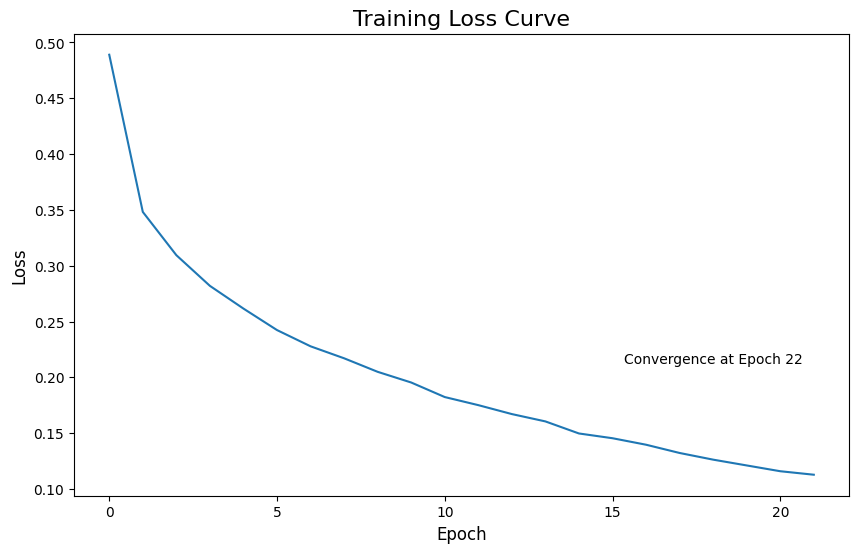

In [ ]:
# training loss curve

plt.figure(figsize=(10,6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Curve', fontsize=16)
# plt.grid(True)
plt.annotate(
    f'Convergence at Epoch {mlp.n_iter_}',
    xy=(mlp.n_iter_, mlp.loss_curve_[-1]),
    xytext=(mlp.n_iter_ - 4, mlp.loss_curve_[-1] + 0.1),
    # arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='center',
)
plt.show()

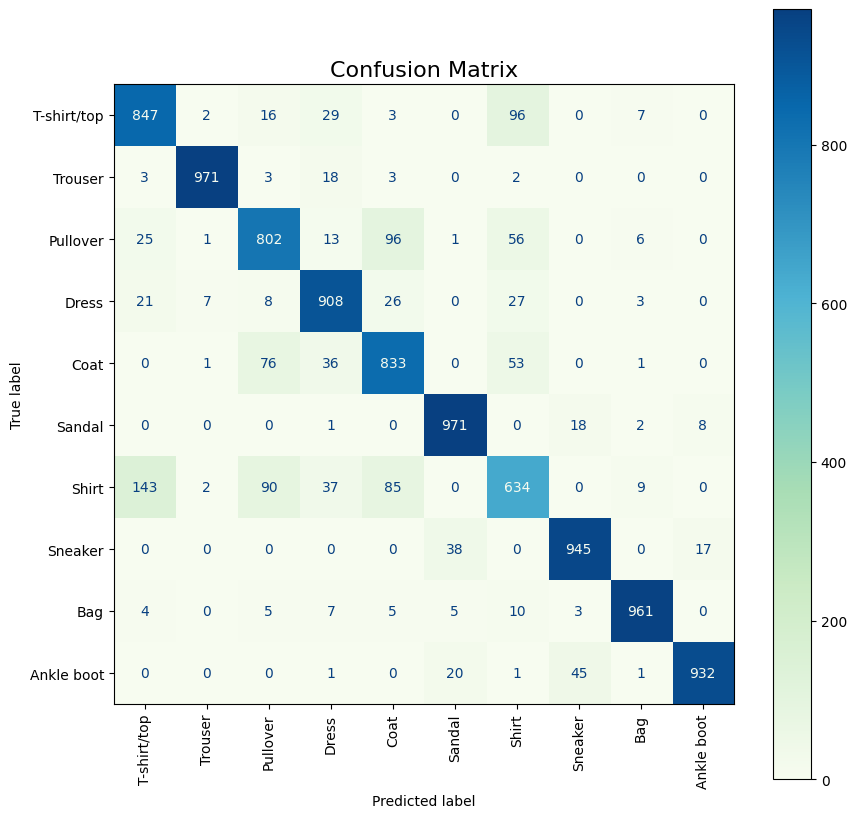

In [ ]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.GnBu, ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix", fontsize=16)
plt.show()


## ablation study

In [ ]:
ablation_configs = [
    {'name': 'Study 1', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 2', 'hidden_layer_sizes': (50,50,50), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 3', 'hidden_layer_sizes': (300,100), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 4', 'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 5', 'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 6', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'sgd', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 7', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.01, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 8', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'sgd', 'learning_rate_init':0.0001, 'alpha': 0.0001, 'early_stopping':False},
    {'name': 'Study 9', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.1, 'early_stopping':False},
    {'name': 'Study 10', 'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.0001, 'early_stopping':True},
    {'name': 'Study 11', 'hidden_layer_sizes': (50,50,50), 'activation': 'relu', 'solver':'adam', 'learning_rate_init':0.001, 'alpha': 0.1, 'early_stopping':False},
    {'name': 'Study 12', 'hidden_layer_sizes': (300,100), 'activation': 'tanh', 'solver':'sgd', 'learning_rate_init':0.01, 'alpha': 0.0001, 'early_stopping':True},
]

results = {}
all_loss_curves = {}
all_cms = {}
summary_metrics = []

for config in ablation_configs:
  ablation_name = config.pop('name')
  print(f" training {ablation_name} ")

  mlp = MLPClassifier(**config)

  start = time.time()
  mlp.fit(X_train, y_train)
  end = time.time()

  y_pred = mlp.predict(X_test)
  y_proba = mlp.predict_proba(X_test) # auc
  # acc = accuracy_score(y_test, y_pred)

  all_loss_curves[ablation_name] = mlp.loss_curve_
  all_cms[ablation_name] = confusion_matrix(y_test, y_pred)

  summary_metrics.append({
      'ablation_name': ablation_name,
      'Accuracy': accuracy_score(y_test, y_pred),
      'F1 (weighted)': f1_score(y_test, y_pred, average='weighted'),
      'AUC (weighted)': roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted'),
      'Epochs': mlp.n_iter_,
      'Training time (s)': end - start,
  })
  print(f"Model converged in {mlp.n_iter_} epochs (max_iter was {mlp.max_iter}).")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

 training Study 1 
Model converged in 86 epochs (max_iter was 200).
Accuracy: 0.8812

 training Study 2 
Model converged in 122 epochs (max_iter was 200).
Accuracy: 0.8713

 training Study 3 
Model converged in 96 epochs (max_iter was 200).
Accuracy: 0.8933

 training Study 4 
Model converged in 157 epochs (max_iter was 200).
Accuracy: 0.8779

 training Study 5 
Model converged in 96 epochs (max_iter was 200).
Accuracy: 0.8690

 training Study 6 


/home/desmond/miniconda3/envs/mds_hw3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model converged in 200 epochs (max_iter was 200).
Accuracy: 0.8871

 training Study 7 
Model converged in 65 epochs (max_iter was 200).
Accuracy: 0.8655

 training Study 8 


/home/desmond/miniconda3/envs/mds_hw3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model converged in 200 epochs (max_iter was 200).
Accuracy: 0.8644

 training Study 9 
Model converged in 102 epochs (max_iter was 200).
Accuracy: 0.8833

 training Study 10 
Model converged in 27 epochs (max_iter was 200).
Accuracy: 0.8838

 training Study 11 
Model converged in 103 epochs (max_iter was 200).
Accuracy: 0.8780

 training Study 12 
Model converged in 29 epochs (max_iter was 200).
Accuracy: 0.8851



In [ ]:
summary_df = pd.DataFrame(summary_metrics)
print(summary_df)

   ablation_name  Accuracy  F1 (weighted)  AUC (weighted)  Epochs  \
0        Study 1    0.8812       0.880445        0.988760      86   
1        Study 2    0.8713       0.871766        0.986440     122   
2        Study 3    0.8933       0.893404        0.990584      96   
3        Study 4    0.8779       0.877754        0.988796     157   
4        Study 5    0.8690       0.868740        0.987722      96   
5        Study 6    0.8871       0.887055        0.990543     200   
6        Study 7    0.8655       0.865169        0.984534      65   
7        Study 8    0.8644       0.863844        0.987592     200   
8        Study 9    0.8833       0.883457        0.989601     102   
9       Study 10    0.8838       0.884375        0.990456      27   
10      Study 11    0.8780       0.878001        0.988058     103   
11      Study 12    0.8851       0.885008        0.990407      29   

    Training time (s)  
0           46.369067  
1           45.964098  
2           71.460624  
3     

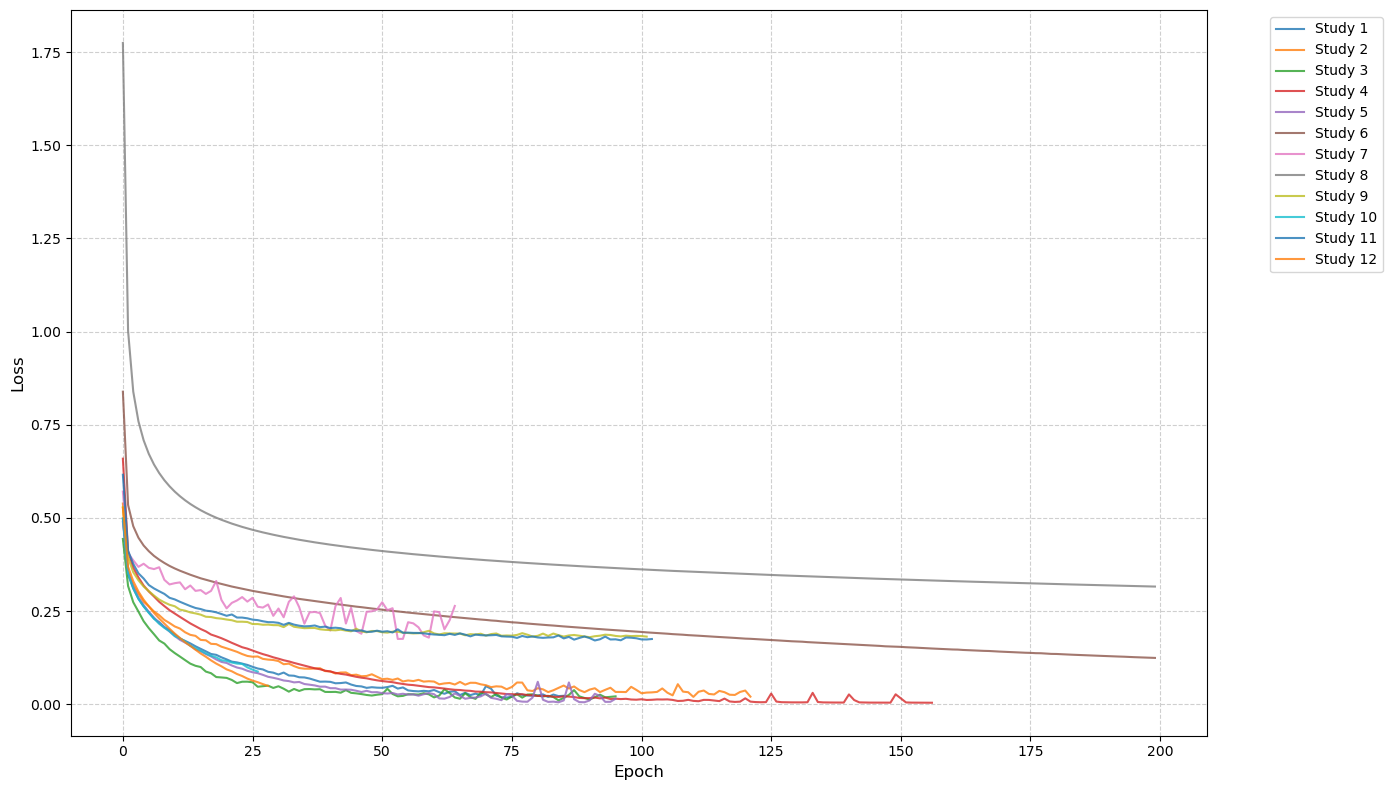

In [ ]:
plt.figure(figsize=(14, 8))

for name, loss_curve in all_loss_curves.items():
    plt.plot(loss_curve, label=name, alpha=0.8)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# plt.title('Training Loss Curves for All Ablations', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

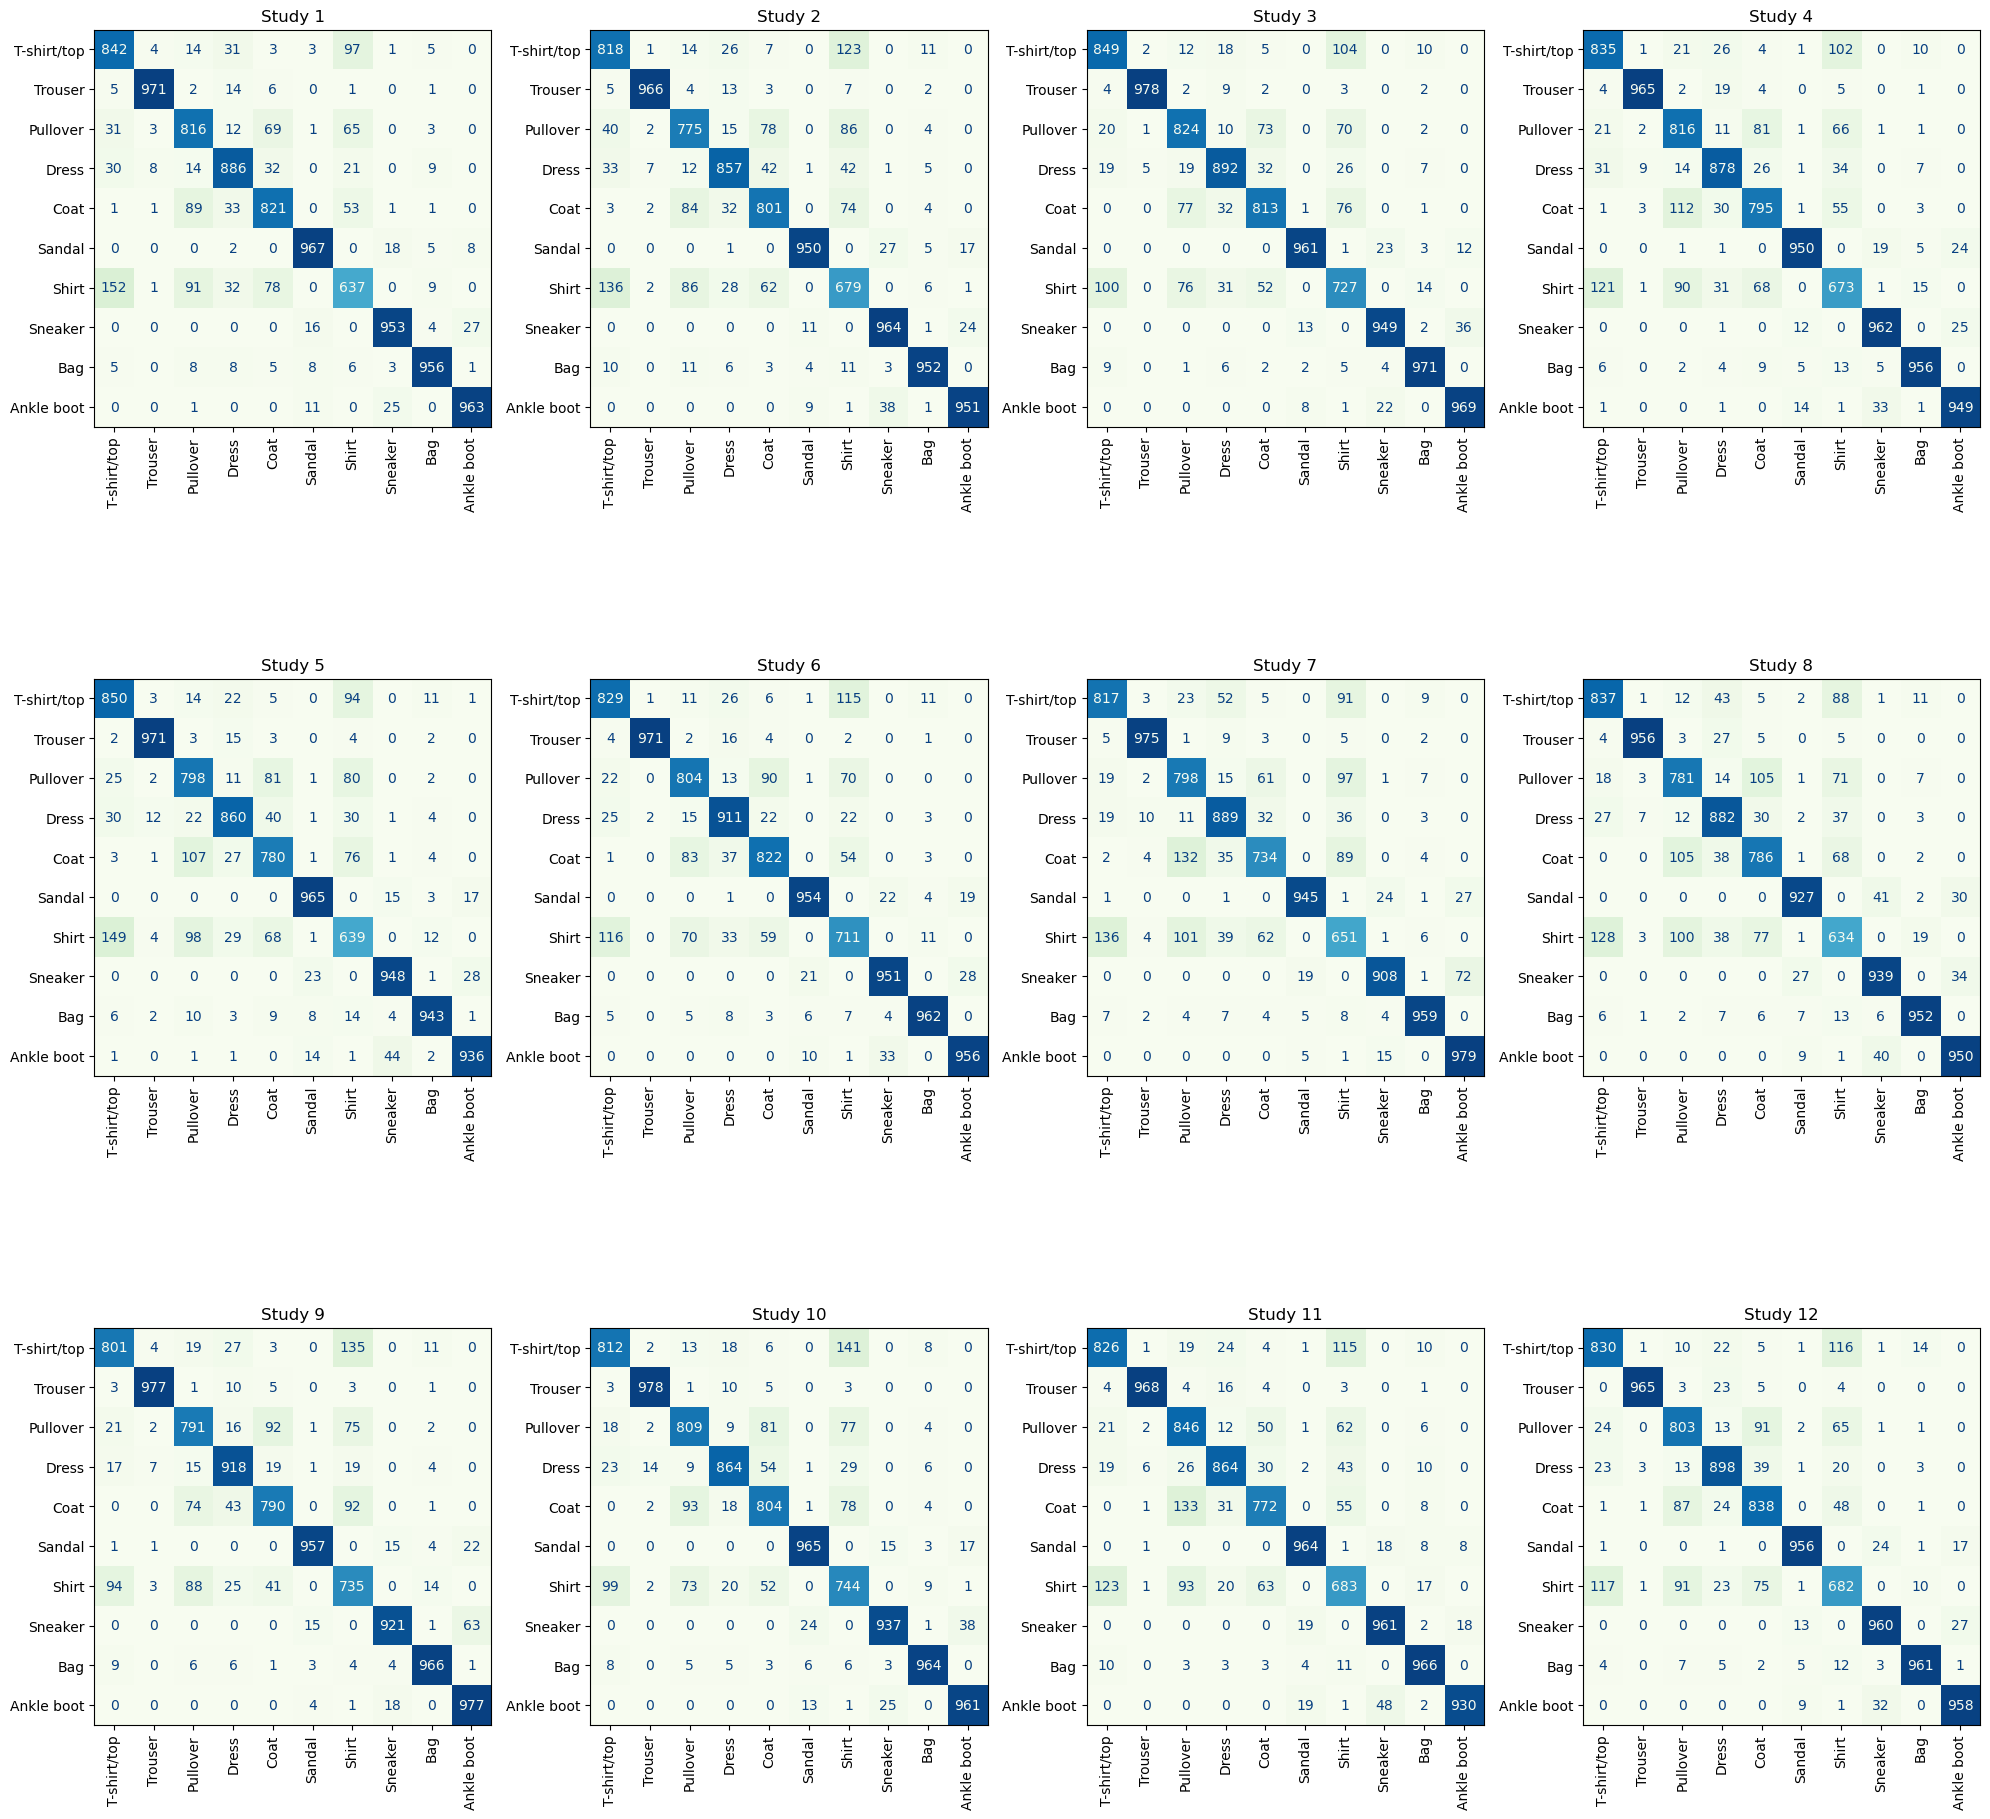

In [ ]:
# create a 3x4 grid for 12 plots

fig, axes = plt.subplots(3, 4, figsize=(20, 20))
axes_flat = axes.flatten()

if len(all_cms) > len(axes_flat):
    print("Warning: More ablations than available subplots. Some CMs won't be plotted.")

for i, (name, cm) in enumerate(all_cms.items()):
    if i >= len(axes_flat):
        break

    ax = axes_flat[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    disp.plot(cmap=plt.cm.GnBu, ax=ax, xticks_rotation='vertical', colorbar=False)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# fig.colorbar(disp.im_, ax=axes.ravel().tolist(), shrink=0.7)
# plt.suptitle('Confusion Matrices for All Ablations', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

BATCH_SIZE = 128
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE * 2, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE * 2, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

In [ ]:
import time
import torchvision.models as models
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Define class names for plotting
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, scheduler=None, model_name="Model"):
    """
    Generic training loop for a PyTorch model.
    """
    print(f"--- Training {model_name} ---")
    start_time = time.time()

    # Store history
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    model.to(device) # Move model to device

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = correct_train / total_train

        # --- Validation Phase ---
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc = correct_val / total_val

        # Log history
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {epoch_train_loss:.4f} - Train Acc: {epoch_train_acc:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f} - Val Acc: {epoch_val_acc:.4f}")

        # LR Scheduler step
        if scheduler and isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(epoch_val_loss)
        elif scheduler:
            scheduler.step()

    end_time = time.time()
    train_time = end_time - start_time
    print(f"Finished Training. Total time: {train_time:.2f}s")

    return history, train_time

def evaluate_model(model, test_loader):
    """
    Evaluates the model on the test set and returns accuracy and predictions.
    """
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    return acc, all_labels, all_preds

def plot_metrics(history, model_name):
    """
    Plots training & validation accuracy and loss.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'{model_name} - Training Metrics', fontsize=16)

    # accuracy
    ax1.plot(history['train_acc'], label='Train Accuracy')
    ax1.plot(history['val_acc'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # loss
    ax2.plot(history['train_loss'], label='Train Loss')
    ax2.plot(history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.show()

def plot_confusion_matrix(all_labels, all_preds, class_names, model_name):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# store all results here for final comparison
results = {}

In [ ]:
# Multi-layer perceptron or fully connected network (FCN)

class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc_stack = nn.Sequential(
            nn.Linear(1 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.2), # Add dropout for regularization
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 10) # 10 output classes
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc_stack(x)
        return logits

In [ ]:
NUM_EPOCHS = 20
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optim

model_fcn_sgd = FCN()
optimizer_sgd = optim.SGD(model_fcn_sgd.parameters(), lr=0.01, momentum=0.9)

history_fcn_sgd, time_fcn_sgd = train_model(
    model_fcn_sgd, criterion, optimizer_sgd,
    train_loader, val_loader, NUM_EPOCHS,
    model_name="FCN (SGD)"
)

acc_fcn_sgd, _, _ = evaluate_model(model_fcn_sgd, test_loader)
results['FCN (SGD)'] = {
    'history': history_fcn_sgd,
    'time': time_fcn_sgd,
    'test_acc': acc_fcn_sgd
}
plot_metrics(history_fcn_sgd, "FCN (SGD)")

In [ ]:
# Adam optim

model_fcn_adam = FCN()
optimizer_adam = optim.Adam(model_fcn_adam.parameters(), lr=0.001)

history_fcn_adam, time_fcn_adam = train_model(
    model_fcn_adam, criterion, optimizer_adam,
    train_loader, val_loader, NUM_EPOCHS,
    model_name="FCN (Adam)"
)

acc_fcn_adam, _, _ = evaluate_model(model_fcn_adam, test_loader)
results['FCN (Adam)'] = {
    'history': history_fcn_adam,
    'time': time_fcn_adam,
    'test_acc': acc_fcn_adam
}
plot_metrics(history_fcn_adam, "FCN (Adam)")

In [ ]:
# adam optim & reduceLROnPlateau

model_fcn_sched = FCN()
optimizer_sched = optim.Adam(model_fcn_sched.parameters(), lr=0.001)
scheduler_sched = ReduceLROnPlateau(optimizer_sched, mode='min', factor=0.1, patience=3, verbose=True)

history_fcn_sched, time_fcn_sched = train_model(
    model_fcn_sched, criterion, optimizer_sched,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_sched,
    model_name="FCN (Adam + Scheduler)"
)

acc_fcn_sched, labels_fcn, preds_fcn = evaluate_model(model_fcn_sched, test_loader)
results['FCN (Adam + Scheduler)'] = {
    'history': history_fcn_sched,
    'time': time_fcn_sched,
    'test_acc': acc_fcn_sched,
    'labels': labels_fcn,
    'preds': preds_fcn
}
plot_metrics(history_fcn_sched, "FCN (Adam + Scheduler)")

In [ ]:
# CNN

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_stack = nn.Sequential(
            # Input: (N, 1, 28, 28)
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            # (N, 32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (N, 32, 14, 14)

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            # (N, 64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # (N, 64, 7, 7)
        )

        self.flatten = nn.Flatten()

        self.fc_stack = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10) # 10 output classes
        )

    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        logits = self.fc_stack(x)
        return logits


We'll train this model using our best setup from Model 1: Adam + ReduceLROnPlateau.

model_cnn = CNN()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)
scheduler_cnn = ReduceLROnPlateau(optimizer_cnn, mode='min', factor=0.1, patience=3, verbose=True)

history_cnn, time_cnn = train_model(
    model_cnn, criterion, optimizer_cnn,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_cnn,
    model_name="CNN (Adam + Scheduler)"
)

acc_cnn, labels_cnn, preds_cnn = evaluate_model(model_cnn, test_loader)
results['CNN'] = {
    'history': history_cnn,
    'time': time_cnn,
    'test_acc': acc_cnn,
    'labels': labels_cnn,
    'preds': preds_cnn
}
plot_metrics(history_cnn, "CNN")

In [ ]:
# transfer learning

def create_resnet18_for_fashion_mnist():
    """
    Creates a ResNet18 model modified for 1-channel, 28x28 input
    and 10 output classes.
    """
    # Load pretrained ResNet18
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

    # --- 1. Modify conv1 for 1 input channel ---
    # Get weights from original 3-channel conv
    original_weights = model.conv1.weight.data

    # Create new 1-channel conv layer
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # Initialize new weights by averaging old ones across the input channel dim
    with torch.no_grad():
        model.conv1.weight.data = original_weights.mean(dim=1, keepdim=True)

    # --- 2. Modify fc layer for 10 output classes ---
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 10)

    return model

model_resnet = create_resnet18_for_fashion_mnist()
optimizer_resnet = optim.Adam(model_resnet.parameters(), lr=0.0001) # Use a smaller LR for fine-tuning
scheduler_resnet = ReduceLROnPlateau(optimizer_resnet, mode='min', factor=0.1, patience=3, verbose=True)

history_resnet, time_resnet = train_model(
    model_resnet, criterion, optimizer_resnet,
    train_loader, val_loader, NUM_EPOCHS,
    scheduler=scheduler_resnet,
    model_name="ResNet18 (Fine-Tuned)"
)

acc_resnet, labels_resnet, preds_resnet = evaluate_model(model_resnet, test_loader)
results['ResNet18'] = {
    'history': history_resnet,
    'time': time_resnet,
    'test_acc': acc_resnet,
    'labels': labels_resnet,
    'preds': preds_resnet
}
plot_metrics(history_resnet, "ResNet18")

In [ ]:
print("--- Final Model Comparison ---")
print(f"| Model                   | Test Accuracy | Train Time (s) |")
print(f"|-------------------------|---------------|----------------|")
for name, res in results.items():
    if 'test_acc' in res:
        print(f"| {name:<23} | {res['test_acc'] * 100:>13.2f}% | {res['time']:>14.2f} |")

# plot confusion matrices for the best FCN, the CNN, and ResNet
plot_confusion_matrix(results['FCN (Adam + Scheduler)']['labels'],
                      results['FCN (Adam + Scheduler)']['preds'],
                      class_names, "FCN (Best)")

plot_confusion_matrix(results['CNN']['labels'],
                      results['CNN']['preds'],
                      class_names, "CNN")

plot_confusion_matrix(results['ResNet18']['labels'],
                      results['ResNet18']['preds'],
                      class_names, "ResNet18")